## Ising Model
Random thoughts: backend Python, frontend Vue (https://blog.boot.dev/backend/best-backends-for-vue/)

Credit: https://aiichironakano.github.io/cs653/08-2TFIM.pdf

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram   
from qiskit.providers.aer import QasmSimulator

In [23]:
##### Trotter propagation in transverse-field Ising model #####

### Physical parameters (atomic units) ###
J = 1.7 # Exchange coupling
B = 50 # Transverse magnetic field
dt = 0.001 # Time-discretization unit

### Build circuit
circ = QuantumCircuit(2, 2) # 2 quantum, 2 classical registers
time_steps = 2000
print('Time simulation run (sec): ', time_steps * dt)
for i in range(0, time_steps):
    circ.rx(-2*dt*B, 0) # Transverse-field propagation of spin 0
    circ.rx(-2*dt*B, 1) # Transverse-field propagation of spin 1
    circ.cx(0, 1) # Exchange-coupling time propagation (1)
    circ.rz(-2*dt*J, 1) # (2)
    circ.cx(0, 1) # (3)

circ.measure(range(2), range(2)) # Measure both spins
#circ.draw()

Time simulation run (sec):  2.0


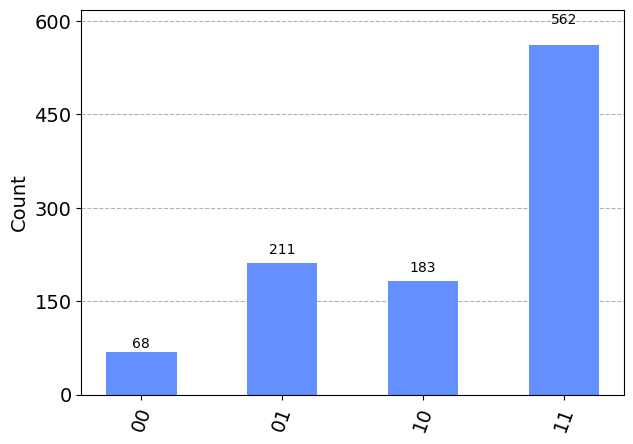

In [24]:
backend = QasmSimulator()
# Transpile the quantum circuit to low-level QASM instructions
circ_compiled = transpile(circ, backend)
# Execute the circuit on the Qasm simulator, repeating 1024 times
job_sim = backend.run(circ_compiled, shots=1024)
result_sim = job_sim.result() # Grab the results from the job
counts = result_sim.get_counts(circ_compiled) # Get the result

plot_histogram(counts) 